Some interesting questions that can be answered using this dataset are:

1. Which apps are most reviewed? Of those, which ones have the highest rating, let's say the top 10?

2. 

# Deal with missing values First thing!!!!!!!!!!!!!!! (missing >60%, remove)

# https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html


# It does make sense to remove the lower bins (10,000 & less) as long as explicitly stated to audience:

# df = df[df["A"] < 10000]

# Keep going in the same format

# Q3 = stat test

### Dataset Context

The applications -or *apps*- offered in the Google Play store are in the millions and growing. As of the writing of this project, the Google Play store is estimated to hold 2.6 million applications. The creator of this dataset, Lavanya Gupta, was able to obtain data on 10,000 of these apps.

She obtained the dataset through scraping the store, which uses dynamic page loading. Dynamic page loading means that the store page displays the apps based on what Google knows about the user requesting the page. And scraping means that she wrote a script that runs through the dynamically-loaded page, reads the data, and outputs it into a structured file, such as the csv file I will be working with for this project.

The data files include another file containing a sentiment analysis conducted on this sample of Google Play apps using the nltk Python library, which stands for Natural Language Toolkit. The objective of this analysis is to try to understand user reviews and what they convey about their opinions of these apps. 

### Dataset Content

#### A. googleplaystore.csv

This file contains the main dataset. It has 10,841 rows of data with the following columns:

*App Category*: Category of the app. This could be beauty, business, entertainment, education...etc.

*Rating*: How users rate the app out of 5, with 1 being the lowest rating and 5 being the highest.

*Reviews*: The number of user reviews each app has received.

*Size*: The memory size needed to install the application.

*Installs*: The number of times each application has been installed by users.

*Type*: Whether the app is free or a paid app.

*Price*: The price of the app.

*Content Rating*: This column specifies the intended audience for the app. Can be for teens, mature audience, or everyone.

*Genres*: The sub-category for each app. Example: for the Education category, this could be Education: Pretend Play.

*Last Updated*: Release date of the most recent update for the app.

*Current Ver*: The app's current version.

*Android Ver*: The oldest version of Android OS supported by the app.


#### B. googleplaystore_user_reviews.csv

This file contains the result of the sentiment analysis conducted by the dataset creator. It has 64,295 rows of data with the following columns:

*App* : Name of the app.

*Translated_Review*: Either the original review in English, or a translated version if the orignal review is in another language.

*Sentiment*: The result of the sentiment analysis conducted on a review. The value is either Positive, Neutral, or Negative.

*Sentiment_Polarity*: A value indicating the positivity or negativity of the sentiment, values range from -1 (most negative) to 1 (most positive).

*Sentiment_Subjectivity*: A value from 0 to 1 indicating the subjectivity of the review. Lower values indicate the review is based on factual information, and higher values indicate the review is based on personal or public opinions or judgements.

### Summary of Limitations

The limitations of the Google Play Store Apps data are:

1. The apps included are relevant to the dataset creator's activity on Google-related sites. She is a Machine Learning Software Developer based in India. It is most likely the applications generated are based on their popularity in the geographical region around India, while this analysis is intended for audience in the U.S or North America.


2. With cloud-based storage available for Android users at little or no cost, app size may have no significant contribution to app popularity. Therefore the *Size* column will be removed.


3. I am not sure if apps follow the same software versioning process, therefore I will assume the *Current Ver* column will be irrelevant to this analysis. Otherwise it would have been useful for measuring current support of the app by its developers.


4. I will assume that the vast majority of users can upgrade their Android devices to the latest version. Based on that, the *Android Ver* column will also be excluded. Any limitations that may justify relying on older versions of Android most probably do not apply to the majority of the population.


5. Scraping data off of a Google website is an unconventional way to obtain it, which may result in misplaced data. This largely depends on the scraper built by the dataset creator.


6. The sentiment analysis result is limited by the abilities of Python's nltk library, which does not support all languages. Reviews with unsupported languages will not be translated and should have no values within the analysis output.

I will start by importing the csv files into two Pandas dataframes, one called *app_data* which contains the main data on the applications, and another called *sentiment_data* containing the sentiment analysis results on app reviews.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#Import the googleplaystore.csv into a Pandas dataframe
app_data = pd.read_csv(r"C:\Users\Mohammad\Documents\Thinkful\7.11 Capstone 1 Analytic Report and Research Proposal\google-play-store-apps\googleplaystore.csv")

#Show the first 3 rows of the dataframe
app_data.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


With over 10,000 rows of data being obtained through a scraper, and rating and reviews being non-mandatory for users, we can expect some missing data in our columns. Let's construct a clear picture of what how many missing values we have in each column:

In [3]:
#header
print ("Missing Values"+"\n"+"-"*15+"\n")

#Iterate over columns and calculate the sum of missing for each column
for column in app_data.columns:
    missing_vals = app_data[column].isna().sum()
    percentage = round(missing_vals/len(app_data)*100,0)
    percentage = str(percentage)+"%"
    print (column+": "+ str(missing_vals)+" <"+"-"*6+percentage + " of total.")

Missing Values
---------------

App: 0 <------0.0% of total.
Category: 0 <------0.0% of total.
Rating: 1474 <------14.0% of total.
Reviews: 0 <------0.0% of total.
Size: 0 <------0.0% of total.
Installs: 0 <------0.0% of total.
Type: 1 <------0.0% of total.
Price: 0 <------0.0% of total.
Content Rating: 1 <------0.0% of total.
Genres: 0 <------0.0% of total.
Last Updated: 0 <------0.0% of total.
Current Ver: 8 <------0.0% of total.
Android Ver: 3 <------0.0% of total.


Except for the *Rating* column values, I would say we have a good dataset. Since answering our first question relies on having user-generated ratings rather than a mean we can calculate to substitute for missing values, these rows will be removed from the dataset.

Now, the rows are in their original sorting order. While the most popular apps are would still be most popular according to India and Lavanya's user behavior, I am confident they are still recognizable by North American audience due to their global offering, let's take a look at the most installed apps within this dataset:

In [4]:
# Sort the original dataset by number of installs to see most popular apps first
app_data = app_data.sort_values(by="Installs", ascending=False)
app_data.head(4)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN
420,UC Browser - Fast Download Private & Secure,COMMUNICATION,4.5,17714850,40M,"500,000,000+",Free,0,Teen,Communication,"August 2, 2018",12.8.5.1121,4.0 and up
474,LINE: Free Calls & Messages,COMMUNICATION,4.2,10790289,Varies with device,"500,000,000+",Free,0,Everyone,Communication,"July 26, 2018",Varies with device,Varies with device
3767,Flipboard: News For Our Time,NEWS_AND_MAGAZINES,4.4,1284017,Varies with device,"500,000,000+",Free,0,Everyone 10+,News & Magazines,"August 3, 2018",Varies with device,Varies with device


*Life Made WI-Fi Touchscreen Photo Frame* is listed in the top, but is not a result of a huge amount of installs. This is probably due to an error in data entry that is attributed to the scraper used to get this dataset. However it is good that only one erroneous row exists beyond the true most-installed app rows. Since erroneous rows are likely to exist outside the range of [0, maximum value], it is a must to check if such rows exist beyond rows with 0 installs as well:

In [5]:
#re-sort the data in ascending order to show least installed apps first
app_data = app_data.sort_values(by="Installs")
app_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device
9337,EG | Explore Folegandros,TRAVEL_AND_LOCAL,NaN,0,56M,0+,Paid,$3.99,Everyone,Travel & Local,"January 22, 2017",1.1.1,4.1 and up
9719,EP Cook Book,MEDICAL,NaN,0,3.2M,0+,Paid,$200.00,Everyone,Medical,"July 26, 2015",1.0,3.0 and up
6692,cronometra-br,PRODUCTIVITY,NaN,0,5.4M,0+,Paid,$154.99,Everyone,Productivity,"November 24, 2017",1.0.0,4.1 and up
8081,CX Network,BUSINESS,NaN,0,10M,0+,Free,0,Everyone,Business,"August 6, 2018",1.3.1,4.1 and up


This is good news, no erroneous rows exist below 0 for the *Installs* column. Therefore all we have to do is delete
that one erroneous row. So far now we will delete:

**Rows:**
1. That erroneous row, with an index number of **10472**
2. All rows with missing -*NaN*- values in the *Rating* column.

**Columns:**
1. *Size*
2. *Current Ver*
3. *Andoird Ver*

In [6]:
#get indexes of rows with NaN values for Rating column
nan_rows = list(app_data[app_data["Rating"].isna()].index)
#add the index of the erroneous row
nan_rows.append(10472)

#remove all rows with missing values
app_data = app_data.drop(nan_rows, axis=0)

#remove unusable columns
app_data = app_data.drop(columns=["Size", "Current Ver","Android Ver"])

#re-sort the data in descending order
app_data = app_data.sort_values(by="Installs", ascending=False)

app_data.head()

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres,Last Updated
342,Viber Messenger,COMMUNICATION,4.3,11334799,"500,000,000+",Free,0,Everyone,Communication,"July 18, 2018"
3703,MX Player,VIDEO_PLAYERS,4.5,6474426,"500,000,000+",Free,0,Everyone,Video Players & Editors,"August 6, 2018"
420,UC Browser - Fast Download Private & Secure,COMMUNICATION,4.5,17714850,"500,000,000+",Free,0,Teen,Communication,"August 2, 2018"
474,LINE: Free Calls & Messages,COMMUNICATION,4.2,10790289,"500,000,000+",Free,0,Everyone,Communication,"July 26, 2018"
3574,Cloud Print,PRODUCTIVITY,4.1,282460,"500,000,000+",Free,0,Everyone,Productivity,"May 23, 2018"


### 1. Which apps are most reviewed? Of those, which ones have the highest rating, let's say the top 10?

To proceed in answering the first part of our first question *What apps are most reviewed?*, it is logical to assume the most installed apps have the most reviews. As mentioned above, the number of installs for each application is not an actual number, but a group or level of installs this app has reached (example: 50 million and up). Therefore we will call them **bins** throughout this document. Let's plot these bins of *Installs* that we have in our dataset:

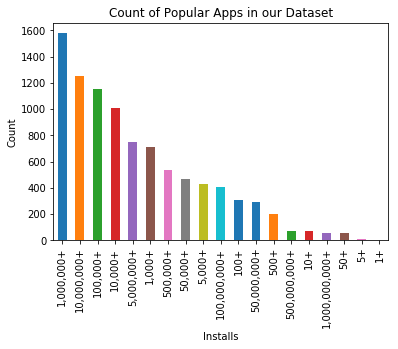

In [7]:
#Generate a series containing count of apps with each bin of number of installs
app_data["Installs"].value_counts().plot(kind='bar')

#Plot each bin of installs with its frequency/occurrence/count in the dataset
plt.title("Count of Popular Apps in our Dataset")
plt.ylabel("Count")
plt.xlabel("Installs")
plt.show()

Most apps in our dataset have been installed over a million times, and over 10 million times resepectively. It only makes sense to compare apps that are in the same bin to each other in terms of reviews and ratings. However, this leaves us with about 20 bins, with many of these apps not being necessarily that popular. To get a better focus on popular apps, I will choose the top 10 bins for this analysis. Which bins are in the top 10?

In [8]:
top_10 = np.unique(app_data["Installs"])

top_10 = sorted(top_10,key=len,reverse=True)
top_10 = top_10[:10]
print(top_10)
del top_10

['1,000,000,000+', '100,000,000+', '500,000,000+', '10,000,000+', '50,000,000+', '1,000,000+', '5,000,000+', '100,000+', '500,000+', '10,000+']


The least known apps in our list of top 10 bins are the ones with more than 10,000 installs. Anything below 10,000 installs will be removed from consideration in answering our first question. The next step is to parse column bins into integer numbers so we can select rows with only those bins in a Pythonic way:

In [9]:
integerized = []
for value in app_data["Installs"]:

    #Remove the + sign from end of value
    value = value.replace("+","")

    #Remove the commas used as thousand-separators, then parse the number to integer
    value = int(value.replace(",",""))

    #add the integer value to the integerized list
    integerized.append(value)

#replace the installs column with the new integer values
app_data["Installs"] = [value for value in pd.Series(integerized)]

del integerized

Now to the final step in finalizing a dataframe that has the necessary data to answer the first question, selecting rows that belong in the top 10 bins:

In [10]:
# A new dataframe containing rows in top 10 bins
top_10_df = app_data[app_data["Installs"] >= 10000]

# How much does this data represent of the original data?
print (str(round(len(top_10_df)/len(app_data)*100,0))+"%")

81.0%


Now to see the most reviewed apps. Apps in each bin will be compared based on the ratio of number of reviews to number of installs, which I will call *Review Ratio*, calculated using the formula: 

$$Review Ratio = \frac {Reviews}{Installs}$$

The *Review* column data type is still string, therefore it will be converted to integer first.

In [11]:
# Parse review column values to integers
top_10_df["Reviews"] = [int(value) for value in top_10_df["Reviews"]]

# add a new column containing review ratios
top_10_df["ReviewRatio"] = top_10_df["Reviews"]/top_10_df["Installs"]

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


Let's take a look at how the review ratios look for our top 10 bins. For each bin, we will take the app with the highest *ReviewRatio*:

In [28]:
most_reviewed = pd.DataFrame()

for a_bin in np.unique(top_10_df["Installs"])[:2]:
    #a dataframe containing apps that belong in the bin
    df = top_10_df[top_10_df["Installs"]==a_bin]
    df = df.loc[df["ReviewRatio"].idxmax()]
    most_reviewed.append(df)
    #take the top row when sorted by Review Ratio descending
    
    
    
    
most_reviewed.head()

""
